In [1]:
%pip install scikit-fuzzy

   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/920.8 kB ? eta -:--:--
   --------------------- ---------------- 524.3/920.8 kB 799.2 kB/s eta 0:00:01
   -------------------------------- ----- 786.4/920.8 kB 958.5 kB/s eta 0:00:01
   -------------------------------- ----- 786.4/920.8 kB 958.5 kB/s eta 0:00:01
   -------------------------------- ----- 786.4/920.8 kB 958.5 kB/s eta 0:00:01
   -------------------------------- ----- 786.4/920.8 kB 958.5 kB/s eta 0:00:01
   -------------------------------- ----- 786.4/920.8 kB 958.5 kB/s eta 0:00:01
   -------------------------------------- 920.8/920.8 kB 366.5 kB/s eta 0:00:00



In [1]:
import numpy as np 
import skfuzzy as fuzz 
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt 

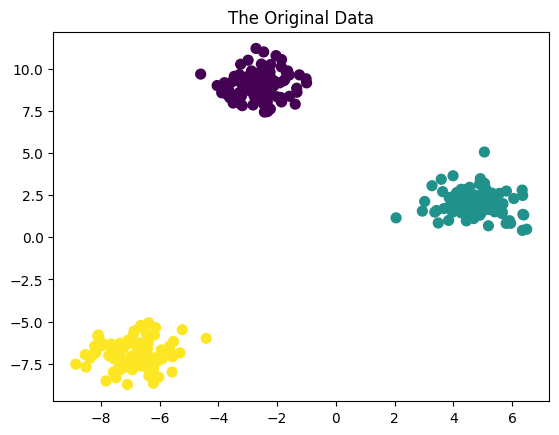

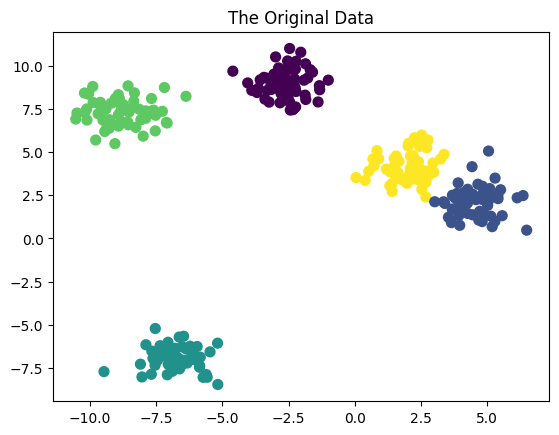

In [ ]:
#create a dataset with 3 clusters
#n_samples = number of points 
#center = numbers of clusters
#cluster_std = 0.8 الانحراف المعياري لكل مجموعة كلما زادت القيمة كانت النقاط أكثر انتشاراً داخل المجموعة
#random_state=42 

X , y_true = make_blobs(n_samples=300,centers=5,cluster_std=0.8,random_state=42)
#X[:,0] : the first column in the dataset
#X[:,1] : the second column in the dataset
#s = the volumn of the circles 
#c=y_true = اللون بناء على التصنيف الحقيقي لكل مقطة 
#cmap='viridis' نوع الخريطة اللونبة المستخدمة 
plt.scatter(X[:,0],X[:,1],s=50,c=y_true,cmap='viridis')
plt.title("The Original Data")
plt.show()

In [4]:
#number of clusters 
n_clusters = 5

#implementaion FCMeans 

cntr , u , u0,d ,jm,p,fpc = fuzz.cluster.cmeans(X.T,n_clusters,m=2,error=0.005,maxiter=1000,init=None)
#X.T : يجب أن تكون البيانات عمودية 
#m=2 معامل الضبابية كلما زادت قيمته زاد التداخل بين المجموعات Fuzziness parameter
#error : الحد الأدنى للتغير في العضوية قبل التوقف 
#maxiter = الحد الأقصى للتكرار 
#init : يمكن تهيئة المراكز يدوياً 

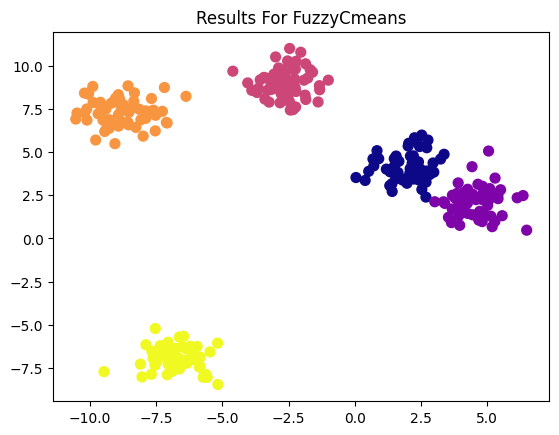

In [5]:
#Calculate the final centers
#الحصول على المحموعة التي تنتمي إليها مل نقطة باستخدام أعلى قيمة لل u 
cluster_membership = np.argmax(u,axis=0)

plt.scatter(X[:,0],X[:,1],s=50,c=cluster_membership,cmap='plasma')
plt.title("Results For FuzzyCmeans")
plt.show()

#u = مصفوفة العضوية أبعادها (n_clusters,n_samples) حيث يمثل كل عمود درجات العضوية لكل نقطة 
#cntr = مراكز المجموعات النهائية 
#fpc = معامل فرز الضبابية كلما اقتربت نتائجه من الواحد كانت المجموعات أكثر وضوحتً fuzzy partition coefficient

In [6]:
#u : درجات العضوية لكل نقطة بالنسبة لكل مجموعة 
#cntr : مواقع مراكز المجموعات بعد التحسين 
#cluster_membership: تصنيف نهائي لكل نقطة بناء على أعلى درجة عضوية

print("The final clusters's centers")
print(cntr)
print("\n(FPC):",fpc)

The final clusters's centers
[[ 2.0371398   4.05561276]
 [ 4.53235278  2.09624837]
 [-2.63776449  8.94740906]
 [-8.90264848  7.29631797]
 [-6.72013588 -6.94916014]]

(FPC): 0.8720028294768656


In [6]:
# u : مصفوفة العضوية النهائية (Final Membership Matrix)
# كل عمود يحتوي على درجات العضوية للعينة مع كل مجموعة.
# #u0:مصفوفة العضوية الابتدائية (Initial Membership Matrix) التي تم إنشاؤها عشوائيًا.
# #d : المسافات بين النقاط ومراكز المجموعات 

# تُستخدم لحساب درجات العضوية. |
# #jm :قيم تكلفة Fuzzy Objective Function في كل تكرار.
# تُستخدم لمراقبة تقدم الخوارزمية وتقاربها
# #p:عدد التكرارات التي حدثت فعليًا قبل التوقف. |
# #fpc:Fuzzy Partition Coefficient – معامل يقيس جودة التقسيم الضبابي.
# يتراوح بين 0 و1.
# كلما اقتربت قيمته من 1، كانت المجموعات أكثر وضوحًا وانفصالًا.

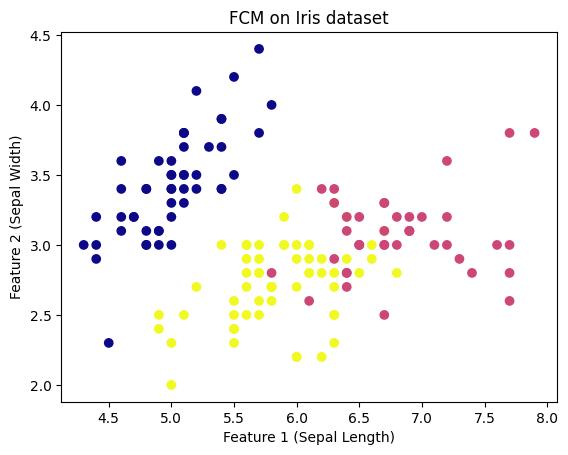

In [10]:
from sklearn.datasets import load_iris

# تحميل البيانات
iris = load_iris()
X_iris = iris.data
n_clusters = 3 
# تشغيل FCM
cntr_iris, u_iris, _, _, _, _, _ = fuzz.cluster.cmeans(
    X_iris.T, n_clusters, m=2, error=0.005, maxiter=1000
)

# التصنيف النهائي
cluster_iris = np.argmax(u_iris, axis=0)

# رسم نتيجة FCM على Iris
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=cluster_iris, cmap='plasma')
plt.title("FCM on Iris dataset")
plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.show()

### Customer Segmentation 

In [1]:
import pandas as pd 

df = pd.read_csv("C:\\Users\\Anwar Altorkmani\\Desktop\\Mall_Customers.csv")

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(df.info)
print(df.describe)

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>
<bound method NDFrame.describe of      CustomerID  Gender  Age  Ann

In [5]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [ ]:
#Encoding Gender
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt 

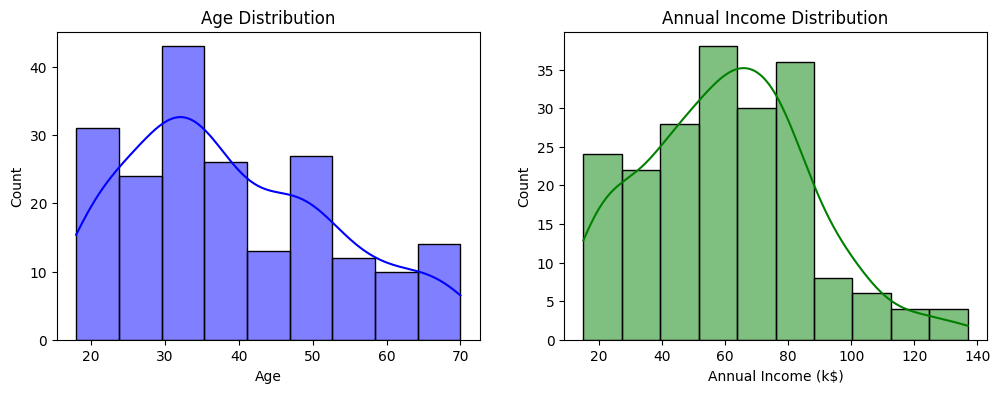

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['Age'],kde=True,color='blue')
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.histplot(df['Annual Income (k$)'],kde=True,color='green')
plt.title('Annual Income Distribution')

plt.show()

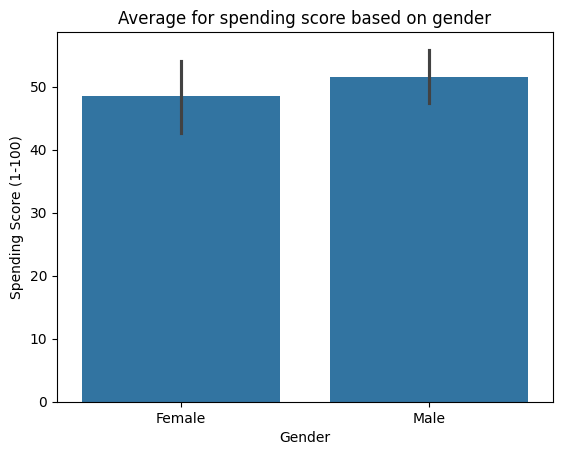

In [12]:
#تحليل إنفاق العملاء حسب جنس الزبون 
sns.barplot(x='Gender',y='Spending Score (1-100)',data=df)
plt.title("Average for spending score based on gender")
plt.xticks([0,1],['Female','Male'])
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler

# اختيار المتغيرات المستقلة
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# تطبيع البيانات
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
#implementing FCMeans
import skfuzzy as fuzz 
import numpy as np 
n_clusters = 5  # عدد المجموعات المراد تقسيم العملاء إليها

# تشغيل FCM
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    X_scaled.T, n_clusters, m=2, error=0.005, maxiter=1000
)

# تصنيف كل عميل إلى أفضل مجموعة
cluster_membership = np.argmax(u, axis=0)


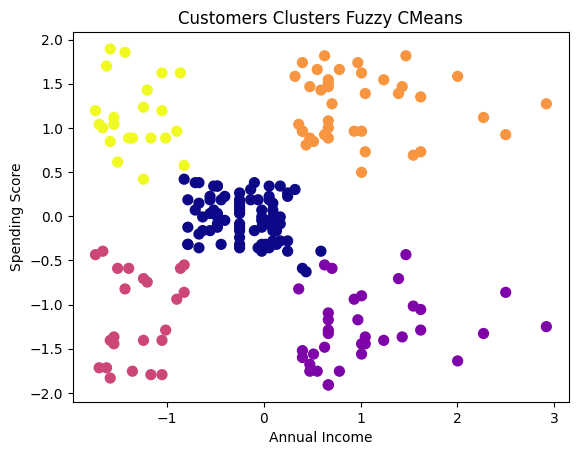

In [17]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_membership, cmap='plasma', s=50)
plt.title('Customers Clusters Fuzzy CMeans')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [18]:
#تفسير المجموعات 
df['Cluster'] = cluster_membership

# متوسطات كل مجموعة
grouped = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(grouped)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 88.200000               17.114286
2                 26.304348               20.913043
3                 86.538462               82.128205
4                 25.727273               79.363636


In [ ]:
print("مراكز المجموعات:")
print(cntr)

print("\nدرجة عضوية أول عميل في كل مجموعة:")
print(u[:, 0])

print("\nمعامل فرز الضبابية FPC:", fpc)

مراكز المجموعات:
[[-0.16527392 -0.02430205]
 [ 0.97603747 -1.30055912]
 [-1.2784528  -1.22994929]
 [ 0.9105951   1.26573912]
 [-1.30140521  1.07478664]]

درجة عضوية أول عميل في كل مجموعة:
[0.1725327  0.05619654 0.54049013 0.04604128 0.18473934]

معامل فرز الضبابية FPC: 0.6710709061900636
